In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [61]:
year = 2023

In [62]:
df = pd.read_csv('training_set_team.csv',index_col=0)
df.isna().sum()
df = df.drop(columns=['W','L'])

In [63]:
df.loc[df['champs'] == 1,'runner_up'] = 1
df['Target'] = df[['Playoffs','champs','runner_up']].sum(axis=1)


In [64]:
# Dropping league average rows

df = df.drop(df[df['Team_long'].str.lower().str.contains('league')].index,axis=0)

In [65]:
# df.loc[(df['champs'] == 1) & (df['runner_up'] == 0),'runner_up']

In [66]:
# df = df[df['Playoffs'] == 1]
df_numeric = df.select_dtypes(include=['number'])

In [67]:
df_numeric = df_numeric.drop(columns=['Playoffs','champs','G','MP','runner_up'])


In [68]:
df_numeric[df_numeric['Year'] == 2020].Target.value_counts()
# df_numeric = df_numeric[df_numeric['Year'] != 2022]

1    14
0    14
2     1
3     1
Name: Target, dtype: int64

In [69]:
X_train = df_numeric[df_numeric['Year'] != year].drop(columns=['Year','Target'])
# X_test = df_numeric[df_numeric['Year'] == 2022].drop(columns=['Year'])
y_train = df_numeric[df_numeric['Year'] != year]['Target']
len(y_train) == len(X_train)

True

In [70]:
X_train.isna().sum()

FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
Age     0
MOV     0
SOS     0
SRS     0
ORtg    0
DRtg    0
NRtg    0
Pace    0
FTr     0
3PAr    0
TS%     0
dtype: int64

In [71]:
X_test = df_numeric[df_numeric['Year'] == year].drop(columns=['Year','Target'])
# X_test = df_numeric[df_numeric['Year'] == 2022].drop(columns=['Year'])
y_test = df_numeric[df_numeric['Year'] == year]['Target']

In [72]:


# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a random forest classifier and fit it to the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

# Evaluate the accuracy of the classifier
# accuracy = clf.score(X_test, y_test)
# print(f"Accuracy: {accuracy}")

In [73]:
X_test[['Proba_0','Proba_1','Proba_2','Proba_3']] = y_pred_prob


In [77]:
results = df.loc[X_test.index,['Team_long','Age']]
results['pred'] = y_pred
results['actual'] = y_test
results[['Proba_0','Proba_1','Proba_2','Proba_3']] = y_pred_prob

In [92]:
results.sort_values('Age',ascending=False).reset_index(drop=True)

,Team_long,Age,pred,actual,Proba_0,Proba_1,Proba_2,Proba_3
0,Milwaukee Bucks,29.8,1,1,0.13,0.66,0.12,0.09
1,Los Angeles Clippers,29.7,1,1,0.26,0.60,0.14,0.00
2,Philadelphia 76ers,28.2,1,1,0.11,0.74,0.11,0.04
3,Phoenix Suns,28.1,1,1,0.16,0.78,0.01,0.05
4,Brooklyn Nets,28.0,1,1,0.28,0.63,0.07,0.02
5,Los Angeles Lakers,27.9,1,1,0.44,0.53,0.03,0.00
6,Dallas Mavericks,27.8,1,0,0.39,0.52,0.09,0.00
7,Miami Heat,27.7,0,1,0.42,0.42,0.13,0.03
8,Chicago Bulls,27.5,1,1,0.15,0.74,0.09,0.02
9,Boston Celtics,27.4,1,1,0.01,0.60,0.21,0.18


<AxesSubplot: >

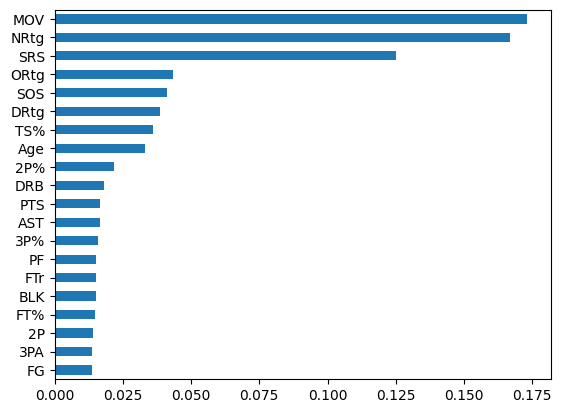

In [76]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')

In [ ]:
sns.heatmap(X_train.corr(numeric_only=True))

In [ ]:
X_train.corr(numeric_only=True)

In [112]:
results['Championship Probability'] = results['Proba_3']*100
results['Finals Probability'] = results['Proba_2']*100
results['Playoff Probability'] = results['Proba_1']*100

<AxesSubplot: xlabel='Playoff Probability', ylabel='Team_long'>

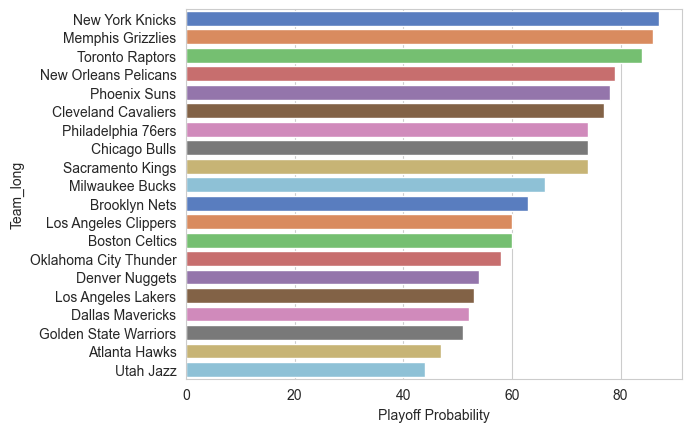

In [124]:
sns.set_style('whitegrid')
sns.set_palette('flare')

sns.barplot(x='Playoff Probability',y='Team_long',data=results.sort_values(by='Proba_1',ascending=False).head(20),palette='muted')

<AxesSubplot: xlabel='Finals Probability', ylabel='Team_long'>

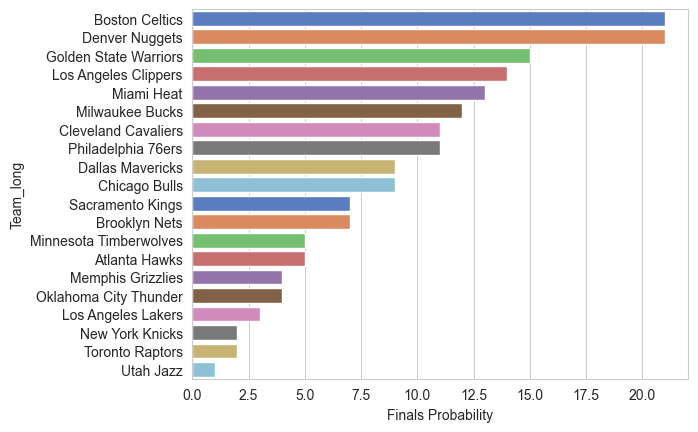

In [125]:
sns.barplot(x='Finals Probability',y='Team_long',data=results.sort_values(by='Proba_2',ascending=False).head(20),palette='muted')

<AxesSubplot: xlabel='Championship Probability', ylabel='Team_long'>

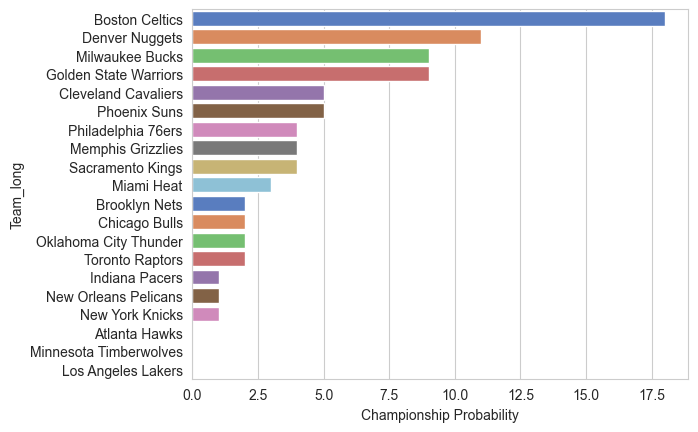

In [126]:
sns.barplot(x='Championship Probability',y='Team_long',data=results.sort_values(by='Proba_3',ascending=False).head(20),palette='muted')